In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv(r'..\data\BankChurners.csv').drop(columns = ['Unnamed: 21'])
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('hls')

In [6]:
set(data.Attrition_Flag.to_list())

{'Attrited Customer', 'Existing Customer'}

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

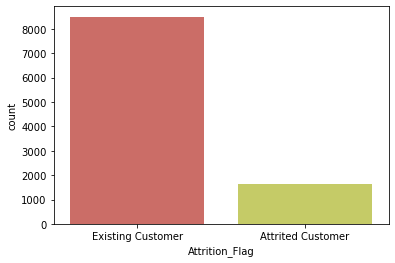

In [7]:
sns.countplot(x = 'Attrition_Flag', data= data)

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

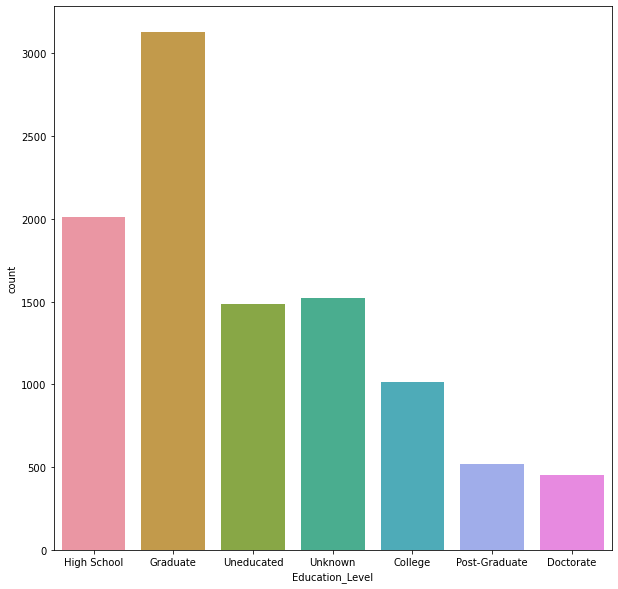

In [8]:
fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x = 'Education_Level', data= data)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

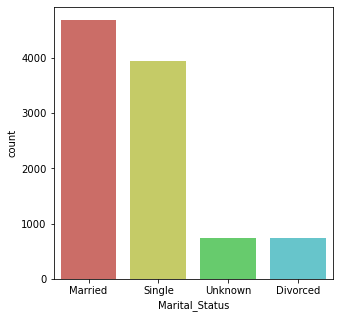

In [9]:
fig, ax = plt.subplots(figsize = (5,5))
sns.countplot(x = 'Marital_Status', data= data)

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

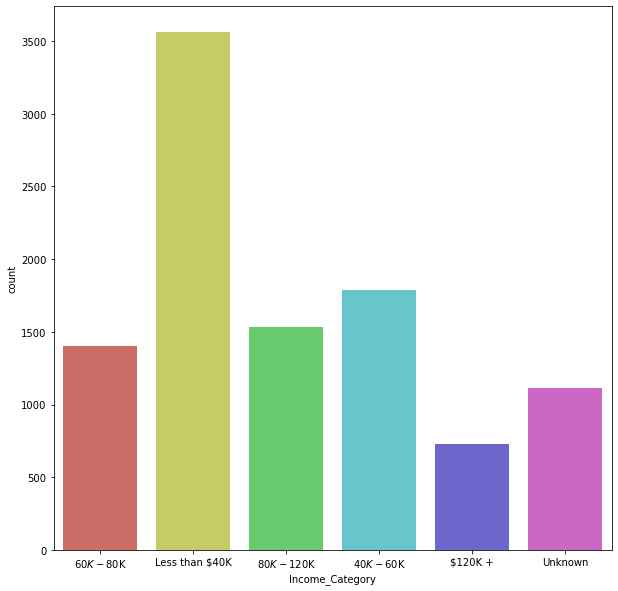

In [10]:
fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x = 'Income_Category', data= data)

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

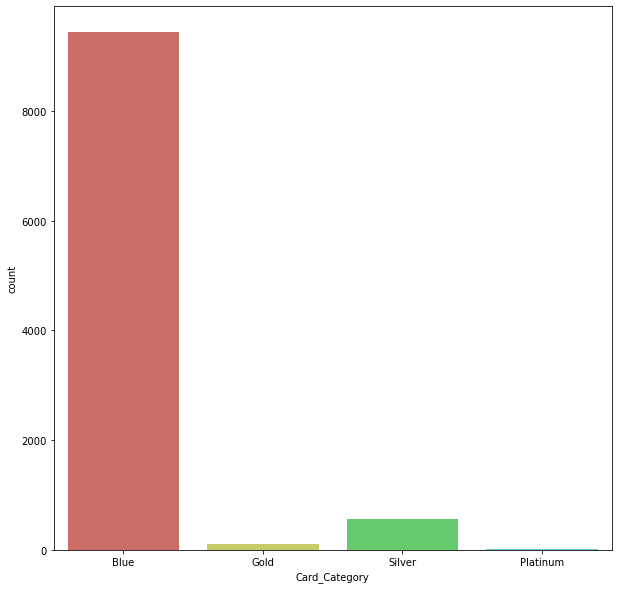

In [11]:
fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x = 'Card_Category', data= data)

In [12]:
def loss_flag(string):
    if string == 'Existing Customer':
        return 0
    else:
        return 1

data['loss_flag'] = [*map(loss_flag, data['Attrition_Flag'])]

In [13]:
## Encoding for Ordinal Categories -- Also since gender in this case only has two categories, we can replace using this method to one-hot encode

replace_key = {'Income_Category' : {'Less than $40K' : 0,
                                    '$40K - $60K' : 1,
                                    '$60K - $80K' : 2,
                                    '$80K - $120K': 3,
                                    '$120K +': 4,
                                    'Unknown' : np.nan},
              'Card_Category' : {'Blue' : 0,
                                 'Silver': 1,
                                 'Gold' : 2,
                                 'Platinum': 3},
              'Education_Level' : {'Uneducated' : 0,
                                    'High School' : 1,
                                    'College' : 2,
                                    'Graduate' : 3,
                                    'Post-Graduate': 4,
                                    'Doctorate' : 5,
                                    'Unknown': np.nan},
              'Gender': {'F' : 1,
                         'M' : 0},
              'Marital_Status': {'Unknown': np.nan}}

In [14]:
data = data.replace(replace_key)
data.describe()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,loss_flag
count,1.012700e+04,10127.000000,10127.000000,10127.000000,8608.000000,9015.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,0.529081,2.346203,2.061106,1.342984,0.083638,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.160660
std,3.690378e+07,8.016814,0.499178,1.298908,1.412810,1.356455,0.333784,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235
min,7.080821e+08,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,0.000000,1.000000,1.000000,0.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000000
50%,7.179264e+08,46.000000,1.000000,2.000000,2.000000,1.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000000
75%,7.731435e+08,52.000000,1.000000,3.000000,3.000000,3.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000000
max,8.283431e+08,73.000000,1.000000,5.000000,5.000000,4.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


In [15]:
data_clean = pd.get_dummies(data,  dummy_na=False, columns=['Marital_Status']).drop(columns =['CLIENTNUM', 'Attrition_Flag'])
data_clean.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,loss_flag,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,45,0,3,1.0,2.0,0,39,5,1,3,...,11914.0,1.335,1144,42,1.625,0.061,0,0,1,0
1,49,1,5,3.0,0.0,0,44,6,1,2,...,7392.0,1.541,1291,33,3.714,0.105,0,0,0,1
2,51,0,3,3.0,3.0,0,36,4,1,0,...,3418.0,2.594,1887,20,2.333,0.000,0,0,1,0
3,40,1,4,1.0,0.0,0,34,3,4,1,...,796.0,1.405,1171,20,2.333,0.760,0,0,0,0
4,40,0,3,0.0,2.0,0,21,5,1,0,...,4716.0,2.175,816,28,2.500,0.000,0,0,1,0


In [16]:
data_clean.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'loss_flag', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single'],
      dtype='object')

In [17]:
continuous_vars = ['Customer_Age','Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [18]:
# minMax scaling the continuous variables
minVec = data_clean[continuous_vars].min().copy()
maxVec = data_clean[continuous_vars].max().copy()
data_clean[continuous_vars] = (data_clean[continuous_vars]-minVec)/(maxVec-minVec)
data_clean.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,loss_flag,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,0.404255,0,0.6,1.0,2.0,0,0.604651,0.8,0.166667,0.500000,...,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061,0,0,1,0
1,0.489362,1,1.0,3.0,0.0,0,0.720930,1.0,0.166667,0.333333,...,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105,0,0,0,1
2,0.531915,0,0.6,3.0,3.0,0,0.534884,0.6,0.166667,0.000000,...,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000,0,0,1,0
3,0.297872,1,0.8,1.0,0.0,0,0.488372,0.4,0.666667,0.166667,...,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761,0,0,0,0
4,0.297872,0,0.6,0.0,2.0,0,0.186047,0.8,0.166667,0.000000,...,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000,0,0,1,0


<AxesSubplot:>

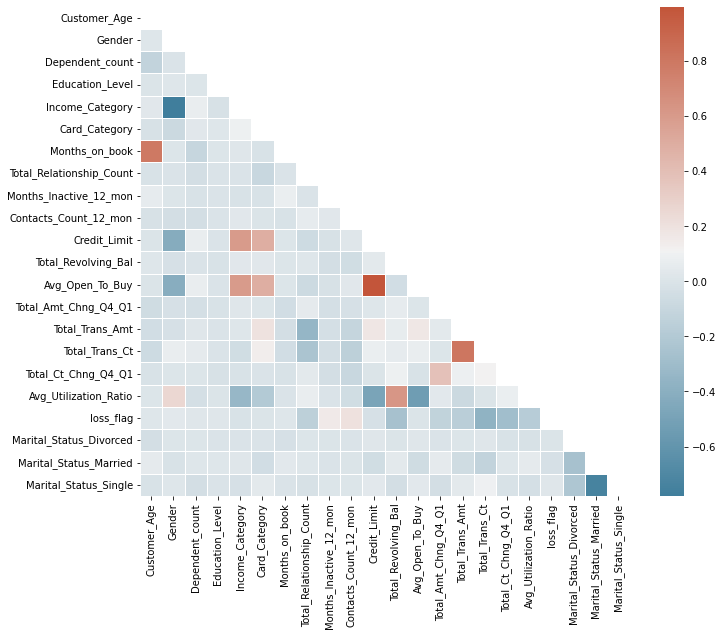

In [19]:
corr = data_clean.corr()
mask = np.triu(np.ones_like(corr, dtype= bool))
f, ax = plt.subplots(figsize= (11, 9))
cmap = sns.diverging_palette(230,20,as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5)

# Initial Thoughts
Lots of things that make sense here: age being strongly correlated with months on book, credit limit with avg open to buy -- although interesting that theres a strong correlation with gender and income category, not important for the project but was interesting.

# Modelling
Because this is a heavily imbalanced dataset, we're going to use different methods to sample to capture that -- will also change what measures we're looking at to compare models. 

In [20]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
### oversampling the dataset to synthetically duplicate rows with the minority class

ros = RandomOverSampler(random_state=0)
data_clean_na = data_clean
data_clean = data_clean.dropna()
X = data_clean.drop(columns = ['loss_flag'])
y = data_clean[['loss_flag']]
X_resampled, y_resampled = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3)

In [21]:
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

In [22]:
def build_model(model,X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    #precision recall score
    average_precision = average_precision_score(y_test, y_proba)

    print(f"Geometric Mean Score:  {geometric_mean_score(y_test, y_pred, average ='weighted'):.2f}"
    )
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.2f}")
    print(classification_report_imbalanced(y_test, y_pred))
    return model
    

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [24]:
model = LogisticRegression()
build_model(model, X_train, X_test, y_train, y_test)

Geometric Mean Score:  0.84
ROC-AUC Score: 0.92
                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.85      0.84      0.84      0.84      0.71      1878
          1       0.85      0.84      0.85      0.85      0.84      0.71      1980

avg / total       0.84      0.84      0.84      0.84      0.84      0.71      3858



LogisticRegression()

In [25]:
#### This is definitely overfitting
model = RandomForestClassifier()
build_model(model, X_train, X_test, y_train, y_test)

Geometric Mean Score:  0.99
ROC-AUC Score: 1.00
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      1.00      0.99      0.99      0.97      1878
          1       0.98      1.00      0.98      0.99      0.99      0.98      1980

avg / total       0.99      0.99      0.99      0.99      0.99      0.98      3858



RandomForestClassifier()

In [26]:
## This still looks really good, which does concern me, but it is performing fine on the training set.
model = RandomForestClassifier(min_samples_leaf=100)
build_model(model, X_train, X_test, y_train, y_test)

Geometric Mean Score:  0.92
ROC-AUC Score: 0.97
                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.93      0.91      0.92      0.92      0.85      1878
          1       0.93      0.91      0.93      0.92      0.92      0.85      1980

avg / total       0.92      0.92      0.92      0.92      0.92      0.85      3858



RandomForestClassifier(min_samples_leaf=100)

In [27]:
## This is very concerning to me and I feel there may be data leakage of some sort, an AUC of 1 shouldn't be happening here.
model = XGBClassifier()
test = build_model(model, X_train, X_test, y_train, y_test)

[14:31:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Geometric Mean Score:  0.99
ROC-AUC Score: 1.00
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      1.00      0.99      0.99      0.97      1878
          1       0.98      1.00      0.98      0.99      0.99      0.98      1980

avg / total       0.99      0.99      0.99      0.99      0.99      0.98      3858



In [28]:
X = data_clean.drop(columns = ['loss_flag'])
y = data_clean[['loss_flag']]
X, X_valid, y, y_valid, = train_test_split(X, y, test_size = 0.3)


ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3)

In [29]:
model = XGBClassifier()
test = build_model(model, X_train, X_test, y_train, y_test)
y_pred = test.predict(X_valid)
y_proba = test.predict_proba(X_valid)[:,1]

    #precision recall score
average_precision = average_precision_score(y_valid, y_proba)
print("VALIDATION DATA")
print(f"Geometric Mean Score:  {geometric_mean_score(y_valid, y_pred, average ='weighted'):.2f}"
    )
print(f"ROC-AUC Score: {roc_auc_score(y_valid, y_proba):.2f}")
print(classification_report_imbalanced(y_valid, y_pred))

[14:31:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Geometric Mean Score:  0.99
ROC-AUC Score: 1.00
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      1.00      0.99      0.99      0.97      1350
          1       0.98      1.00      0.98      0.99      0.99      0.97      1337

avg / total       0.99      0.99      0.99      0.99      0.99      0.97      2687

VALIDATION DATA
Geometric Mean Score:  0.93
ROC-AUC Score: 0.99
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.99      0.89      0.98      0.93      0.88      1953
          1       0.91      0.89      0.99      0.90      0.93      0.86       340

avg / total  

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

[14:31:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Geometric Mean Score:  0.95
ROC-AUC Score: 0.99
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.98      0.91      0.98      0.95      0.90      1333
          1       0.92      0.91      0.98      0.91      0.95      0.89       272

avg / total       0.97      0.97      0.92      0.97      0.95      0.90      1605



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Customer_Age'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'Dependent_count'),
  Text(3, 0, 'Education_Level'),
  Text(4, 0, 'Income_Category'),
  Text(5, 0, 'Card_Category'),
  Text(6, 0, 'Months_on_book'),
  Text(7, 0, 'Total_Relationship_Count'),
  Text(8, 0, 'Months_Inactive_12_mon'),
  Text(9, 0, 'Contacts_Count_12_mon'),
  Text(10, 0, 'Credit_Limit'),
  Text(11, 0, 'Total_Revolving_Bal'),
  Text(12, 0, 'Avg_Open_To_Buy'),
  Text(13, 0, 'Total_Amt_Chng_Q4_Q1'),
  Text(14, 0, 'Total_Trans_Amt'),
  Text(15, 0, 'Total_Trans_Ct'),
  Text(16, 0, 'Total_Ct_Chng_Q4_Q1'),
  Text(17, 0, 'Avg_Utilization_Ratio'),
  Text(18, 0, 'Marital_Status_Divorced'),
  Text(19, 0, 'Marital_Status_Married'),
  Text(20, 0, 'Marital_Status_Single')])

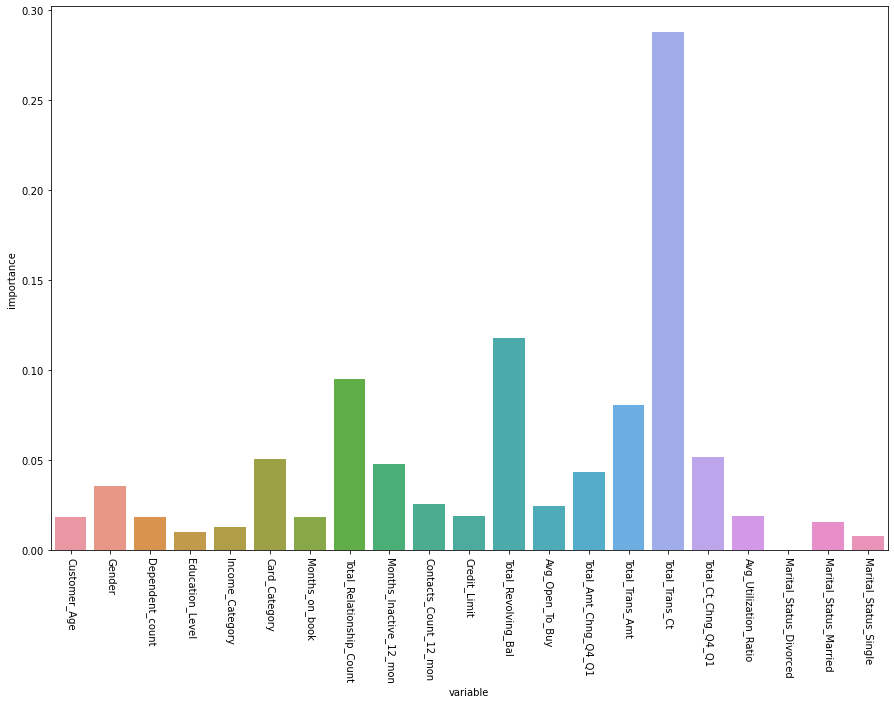

In [31]:
model = XGBClassifier()
xg = build_model(model, X_train, X_test, y_train, y_test)


df = pd.DataFrame(data = {'importance' : test.feature_importances_,
                            'variable': X_train.columns.to_list()})

f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x = 'variable', y = 'importance', data = df)
plt.xticks(rotation = 270)



<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

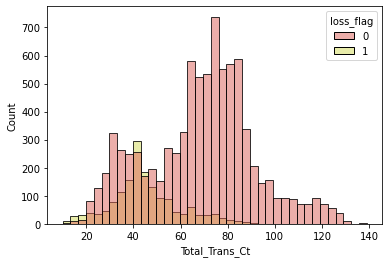

In [32]:
sns.histplot(hue = 'loss_flag', x = 'Total_Trans_Ct', data = data)

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='Count'>

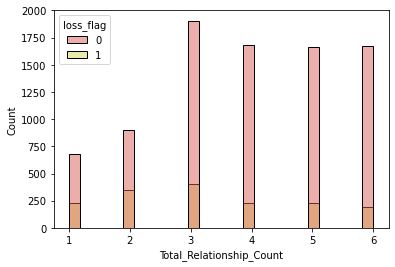

In [33]:
sns.histplot(hue = 'loss_flag', x = 'Total_Relationship_Count', data = data)

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

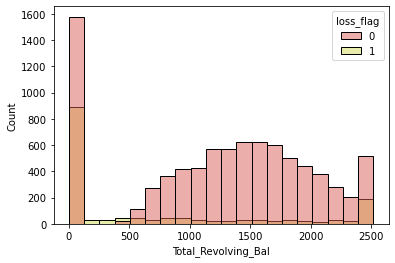

In [34]:
sns.histplot(hue = 'loss_flag', x = 'Total_Revolving_Bal', data = data)

I think Total_Revolving Balance is likely the issue! I'm going to drop it and see how that affects things. Potentially this is data leakage, with customers with a 0 balance having left on their credit card. I would need to know more about the dataset to know for sure, as there is also customers who are with the company with a 0 bal which makes sense. Total_trans_ct + total_trans_amt might also be an issue, if customers in the dataset left more than 12 months ago, but it seems less imbalanced that total_revolving_bal so will leave that in for now.

In [41]:
import pickle

In [35]:
X = data_clean.drop(columns = ['loss_flag', 'Total_Revolving_Bal'])
y = data_clean[['loss_flag']]
X, X_valid, y, y_valid, = train_test_split(X, y, test_size = 0.3)

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3)

[14:31:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Geometric Mean Score:  0.98
ROC-AUC Score: 1.00
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.97      1.00      0.98      0.98      0.97      1353
          1       0.97      1.00      0.97      0.99      0.98      0.97      1355

avg / total       0.99      0.98      0.98      0.98      0.98      0.97      2708

 VALIDATION DATA
VALIDATION DATA
Geometric Mean Score:  0.94
ROC-AUC Score: 0.99
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.97      0.90      0.98      0.94      0.88      1918
          1       0.87      0.90      0.97      0.89      0.94      0.87       3

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Customer_Age'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'Dependent_count'),
  Text(3, 0, 'Education_Level'),
  Text(4, 0, 'Income_Category'),
  Text(5, 0, 'Card_Category'),
  Text(6, 0, 'Months_on_book'),
  Text(7, 0, 'Total_Relationship_Count'),
  Text(8, 0, 'Months_Inactive_12_mon'),
  Text(9, 0, 'Contacts_Count_12_mon'),
  Text(10, 0, 'Credit_Limit'),
  Text(11, 0, 'Avg_Open_To_Buy'),
  Text(12, 0, 'Total_Amt_Chng_Q4_Q1'),
  Text(13, 0, 'Total_Trans_Amt'),
  Text(14, 0, 'Total_Trans_Ct'),
  Text(15, 0, 'Total_Ct_Chng_Q4_Q1'),
  Text(16, 0, 'Avg_Utilization_Ratio'),
  Text(17, 0, 'Marital_Status_Divorced'),
  Text(18, 0, 'Marital_Status_Married'),
  Text(19, 0, 'Marital_Status_Single')])

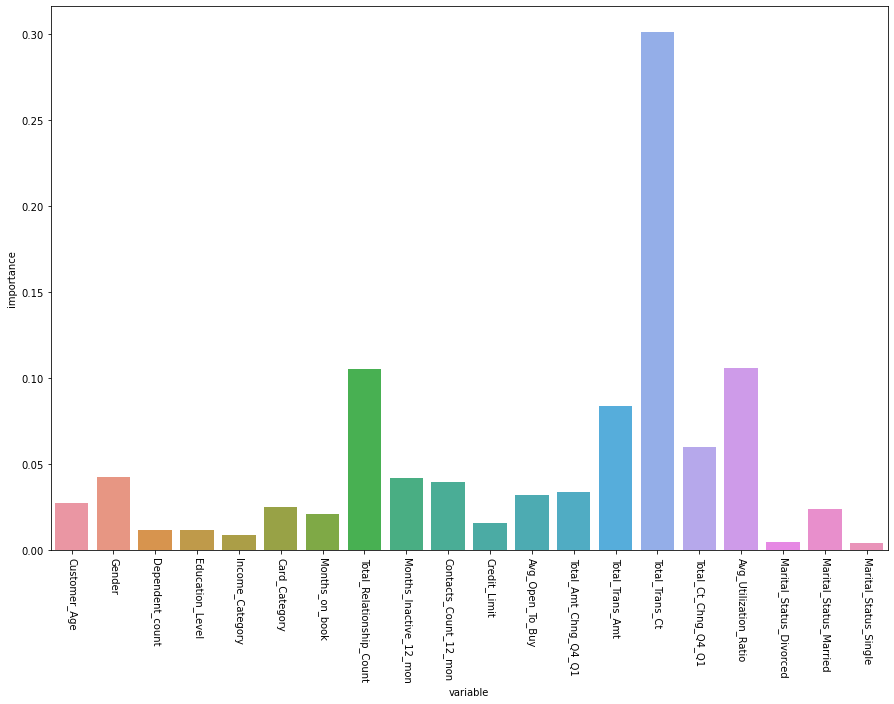

In [36]:
model = XGBClassifier()
xg = build_model(model, X_train, X_test, y_train, y_test)


df = pd.DataFrame(data = {'importance' : xg.feature_importances_,
                            'variable': X_train.columns.to_list()})

print(" VALIDATION DATA")
y_pred = xg.predict(X_valid)
y_proba = xg.predict_proba(X_valid)[:,1]

    #precision recall score
average_precision = average_precision_score(y_valid, y_proba)
print("VALIDATION DATA")
print(f"Geometric Mean Score:  {geometric_mean_score(y_valid, y_pred, average ='weighted'):.2f}"
    )
print(f"ROC-AUC Score: {roc_auc_score(y_valid, y_proba):.2f}")
print(classification_report_imbalanced(y_valid, y_pred))

f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x = 'variable', y = 'importance', data = df)
plt.xticks(rotation = 270)

In [37]:
model = RandomForestClassifier()
model = build_model(model, X_train, X_test, y_train, y_test)

print(" VALIDATION DATA")
y_pred = model.predict(X_valid)
y_proba = model.predict_proba(X_valid)[:,1]

    #precision recall score
average_precision = average_precision_score(y_valid, y_proba)
print("VALIDATION DATA")
print(f"Geometric Mean Score:  {geometric_mean_score(y_valid, y_pred, average ='weighted'):.2f}"
    )
print(f"ROC-AUC Score: {roc_auc_score(y_valid, y_proba):.2f}")
print(classification_report_imbalanced(y_valid, y_pred))


Geometric Mean Score:  0.99
ROC-AUC Score: 1.00
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.97      1.00      0.99      0.99      0.97      1353
          1       0.97      1.00      0.97      0.99      0.99      0.97      1355

avg / total       0.99      0.99      0.99      0.99      0.99      0.97      2708

 VALIDATION DATA
VALIDATION DATA
Geometric Mean Score:  0.91
ROC-AUC Score: 0.99
                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.98      0.85      0.97      0.91      0.84      1918
          1       0.88      0.85      0.98      0.86      0.91      0.82       375

avg / total       0.95      0.96      0.87      0.96      0.91      0.83      2293



In [38]:
model = LogisticRegression()
model = build_model(model, X_train, X_test, y_train, y_test)

print(" VALIDATION DATA")
y_pred = model.predict(X_valid)
y_proba = model.predict_proba(X_valid)[:,1]

    #precision recall score
average_precision = average_precision_score(y_valid, y_proba)
print("VALIDATION DATA")
print(f"Geometric Mean Score:  {geometric_mean_score(y_valid, y_pred, average ='weighted'):.2f}"
    )
print(f"ROC-AUC Score: {roc_auc_score(y_valid, y_proba):.2f}")
print(classification_report_imbalanced(y_valid, y_pred))

Geometric Mean Score:  0.82
ROC-AUC Score: 0.90
                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.81      0.83      0.82      0.82      0.67      1353
          1       0.81      0.83      0.81      0.82      0.82      0.67      1355

avg / total       0.82      0.82      0.82      0.82      0.82      0.67      2708

 VALIDATION DATA
VALIDATION DATA
Geometric Mean Score:  0.84
ROC-AUC Score: 0.92
                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.83      0.85      0.89      0.84      0.70      1918
          1       0.49      0.85      0.83      0.62      0.84      0.70       375

avg / total       0.89      0.83      0.84      0.85      0.84      0.70      2293



In [40]:
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [44]:
pickle.dump(xg, open(r'../model/xgboost_model.pkl', 'wb'))